### Objective

Preserve the waterbodies (Lake, Aquifier, Water Spring, River) for efficient water supply management. To achieve this,it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime as dt

In [29]:
#Dowloading the data for Lake Bilancino 
lb= pd.read_csv('Lake_Bilancino.csv')
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [30]:
lb.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [31]:
#Checking the columns
lb.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [32]:
#Checking data of Lake Bilancino
lb.tail()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6
6602,30/06/2020,0.0,0.0,0.0,0.0,0.0,22.75,250.80,0.6


### Dataset features provided

The features provided are Rain fall, Temperature, Lake level, Flow Rate

Output expected Predicted Lake Level and Flow rate.

### Tentative Analysis approach

1) Plot unfiltered data to see trend->Check the Corelation->Use ML Models to predict flow & Level of lake -> fine tune the model to improve the accuracy.

2) Plot unfiltered data to see trend->Check the Corelation->Use features to build a mathematical model to predict flow & Level of lake -> fine tune the model to improve the accuracy

In [33]:
# Handling date data type
lb['Date']= pd.to_datetime(lb['Date'])
lb['Year']= lb['Date'].dt.year
lb['Month']=lb['Date'].dt.month
lb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
 9   Year                  6603 non-null   int64         
 10  Month                 6603 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 567.6 KB


In [34]:
lb.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month
0,2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,3
1,2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,4
2,2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,5
3,2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,6
4,2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31,2002,7


##### Lake level data grouping by year and months

In [35]:
Lake_level= lb.groupby(["Year", "Month"]).Lake_Level.mean().reset_index()
Lake_level.head()

,Year,Month,Lake_Level
0,2002,1,249.158333
1,2002,2,249.143333
2,2002,3,249.172857
3,2002,4,249.148571
4,2002,5,249.130000


plotting the lake level over the TS to see the variation over year

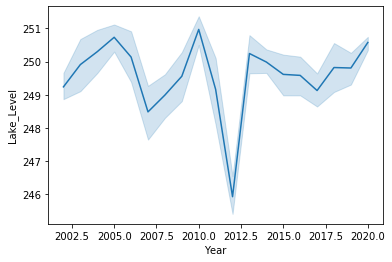

In [36]:
sns.lineplot(data=Lake_level, x="Year", y="Lake_Level")

Minimum Lake level according to the data was 244.52 in 2012 October

In [37]:
print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.min()])

     Year  Month  Lake_Level
129  2012     10  244.520645


Maximum Lake level reached according to historic data was 251.58 in March 2010

In [38]:

print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.max()])

    Year  Month  Lake_Level
98  2010      3  251.582258
